In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [48]:
warnings.filterwarnings('ignore')

# Я использую латинский алфавит

### Использовать так же будем стопы при разметке данных нашей моделью

In [49]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mailw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Пример стоп слов eng алфавита
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [51]:
df = pd.read_csv('data/train.csv')

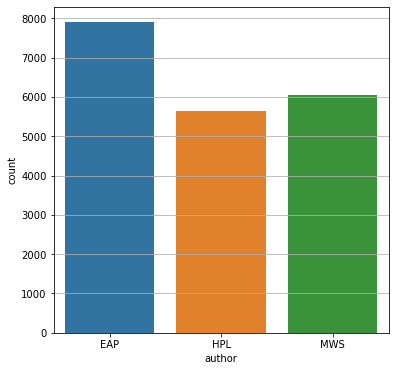

In [52]:
plt.figure(figsize=(6, 6))
sns.countplot(df['author'])
plt.grid(axis='y')
plt.show()

## Приведем данные к нормальному виду, векторизуя их и кодируя

In [53]:
y = df.loc[:,['author']]
en = LabelEncoder()
y = en.fit_transform(y.author.values)

<AxesSubplot:ylabel='count'>

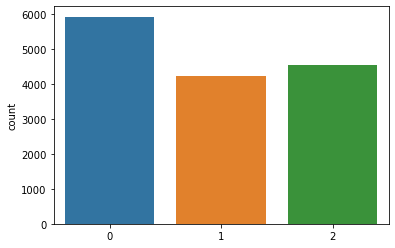

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df.text, y, stratify = y, test_size=.25, shuffle=True, random_state = 42)
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

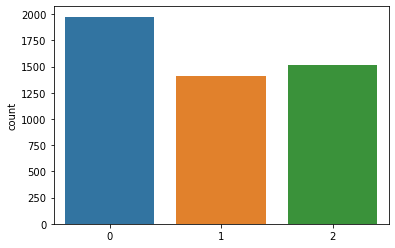

In [55]:
sns.countplot(y_test)

In [56]:
#Создаем инстанс векторайзера
tfid = TfidfVectorizer(stop_words='english')

In [57]:
tfid.fit(list(x_train) + list(x_test))

TfidfVectorizer(stop_words='english')

In [58]:
#Подготавливаем данные для модели, нормализация для текста
x_train = tfid.transform(x_train)
x_test = tfid.transform(x_test)

# Пробуем использовать LR

In [13]:
lgr = LogisticRegression(C=1.0)

In [14]:
lgr.fit(x_train, y_train)

LogisticRegression()

In [15]:
a = lgr.predict_proba(x_test)

def conver(actual, a):
    if len(actual.shape)==1:
        temp = np.zeros((actual.shape[0], a.shape[1]))
        for i,j in enumerate(actual):
            temp[i, j]=1
        actual = temp    
    return actual

binary = conver(y_test, a)

a.shape

(4895, 3)

In [16]:
binary.shape

(4895, 3)

In [17]:
#Посмотрим результат функции потерь
log_loss(binary, a)

0.6046740806846314

# Попробуем использовать SVC модель

In [18]:
sv_model = SVC(probability = True)
sv_model.fit(x_train, y_train)

SVC(probability=True)

In [19]:
predicted=sv_model.predict_proba(x_test)
predicted.shape

(4895, 3)

In [20]:
log_loss(y_test,predicted)

0.5056768893308743

In [23]:
predicted

array([[9.87182939e-01, 2.99636794e-03, 9.82069313e-03],
       [3.89901294e-03, 5.67742071e-04, 9.95533245e-01],
       [4.02554030e-01, 4.98864946e-01, 9.85810232e-02],
       ...,
       [1.91504317e-03, 4.32237074e-04, 9.97652720e-01],
       [1.94235727e-01, 7.67661672e-03, 7.98087656e-01],
       [6.54175015e-01, 6.41662347e-03, 3.39408361e-01]])

In [24]:
y_test

array([0, 2, 0, ..., 2, 2, 2])

In [41]:
# Создадим список для проверки точности модели
testing = []
for j in predicted:
    el = max([el for el in j])
    testing.append(np.where(j == el)[0][0])

In [42]:
accuracy_score(y_test, testing)

0.8053115423901941

In [43]:
#Сводная информация по модели
print(classification_report(y_test, testing))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1975
           1       0.81      0.78      0.80      1409
           2       0.82      0.79      0.80      1511

    accuracy                           0.81      4895
   macro avg       0.81      0.80      0.80      4895
weighted avg       0.81      0.81      0.81      4895

